# Read csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
from matplotlib.gridspec import GridSpec

In [ ]:
customers = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_customers_dataset.csv')

geolocation = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_geolocation_dataset.csv')

items = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_order_items_dataset.csv',\
                    parse_dates=['shipping_limit_date'])

payments = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_order_payments_dataset.csv')

reviews = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_order_reviews_dataset.csv', \
                      parse_dates=['review_creation_date', 'review_answer_timestamp'])

orders = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_orders_dataset.csv', \
                     parse_dates=['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'])

products = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_products_dataset.csv')

sellers = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/olist_sellers_dataset.csv')

category = pd.read_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/product_category_name_translation.csv')

# Exploratory Data Analysis

## Orders dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


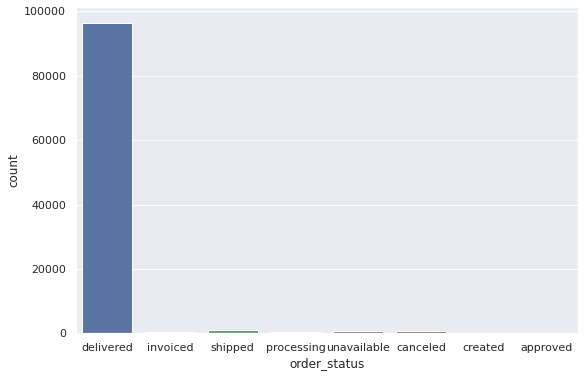

In [ ]:
# countplot order status
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(orders['order_status'])
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

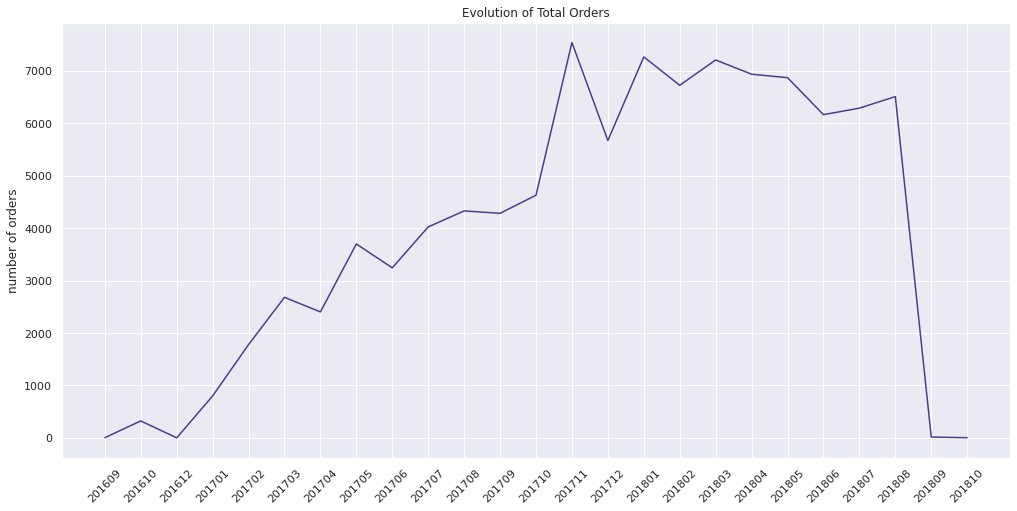

In [ ]:
# plot the evolution of total orders 
import datetime as dt
fig = plt.figure(figsize=(17,8))
ax = sns.lineplot(data=orders['order_purchase_timestamp'].dt.strftime('%Y%m').value_counts().sort_index(), color='darkslateblue')
ax.set_ylabel('number of orders')
ax.set_title('Evolution of Total Orders')
plt.xticks(rotation=45)

## Items dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'items per order')

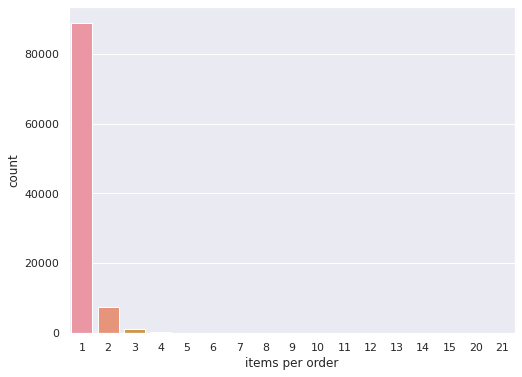

In [ ]:
# countplot nb of items purchased by order
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(items.groupby('order_id').agg({'order_item_id':'count'})['order_item_id'])
ax.set_xlabel('items per order')

## Total sales

In [ ]:
# merge orders and payment on 'order_id' to plot the evolution of monthly total sales
op = orders.merge(payments.groupby('order_id').agg({'payment_value':'sum'}), on='order_id', how='inner')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

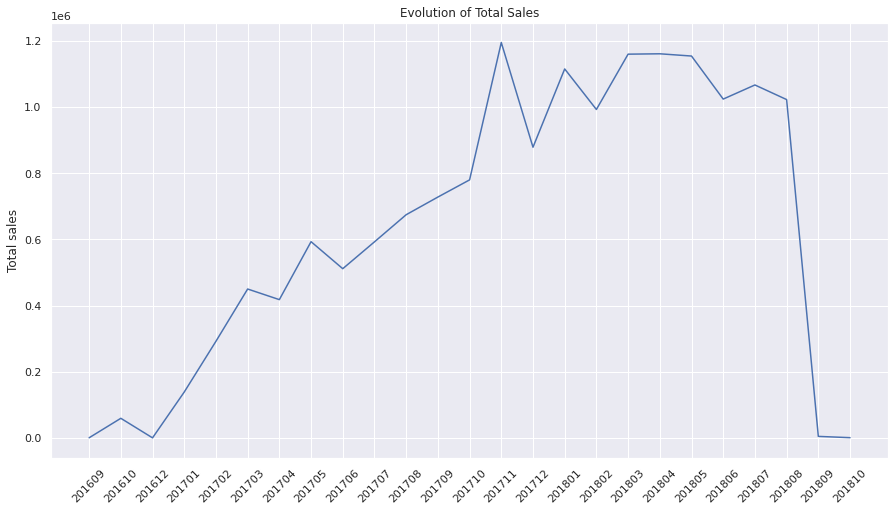

In [ ]:
# group data monthly to track the evolution of total sales
fig = plt.figure(figsize=(17,8))
ax = sns.lineplot(data=op.groupby(op['order_purchase_timestamp'].dt.strftime('%Y%m')).agg({'payment_value':'sum'})['payment_value'])
ax.set_xlabel('')
ax.set_ylabel('Total sales')
ax.set_title('Evolution of Total Sales')
plt.xticks(rotation=45)

## Reviews

In [ ]:
reviews.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41753,100000,100000
unique,99173,99441,NaN,4600,36921,637,99010
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,426,230,466,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


Mean review score is 4.07. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


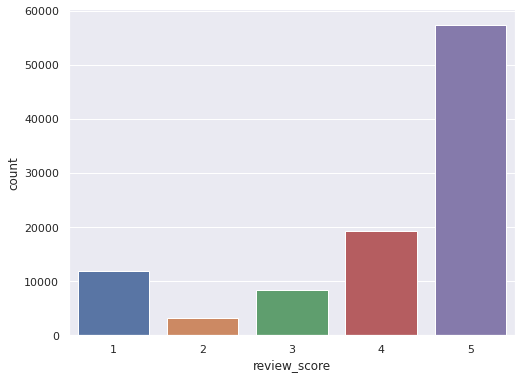

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.countplot(reviews['review_score'])

In [ ]:
reviews.groupby('order_id').agg({'review_score':'mean'})

,review_score
order_id,
00010242fe8c5a6d1ba2dd792cb16214,5.0
00018f77f2f0320c557190d7a144bdd3,4.0
000229ec398224ef6ca0657da4fc703e,5.0
00024acbcdf0a6daa1e931b038114c75,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...
fffc94f6ce00a00581880bf54a75a037,5.0
fffcd46ef2263f404302a634eb57f7eb,5.0
fffce4705a9662cd70adb13d4a31832d,5.0


In [ ]:
# merge orders and reviews on 'order_id'
ord_rev = orders.merge(reviews.groupby('order_id').agg({'review_score':'mean'}), how='left', on='order_id')
ord_rev

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,5.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0


In [ ]:
ord_rev.groupby('order_status').agg({'review_score':'mean'})

,review_score
order_status,
approved,2.500000
canceled,1.800000
created,1.800000
delivered,4.142729
invoiced,1.632166
processing,1.269103
shipped,1.989612
unavailable,1.526273


In [ ]:
ord_rev.groupby('order_status').agg({'review_score':'mean'}).values.tolist()

[[2.5],
 [1.8],
 [1.8],
 [4.142728566788975],
 [1.6321656050955413],
 [1.2691029900332227],
 [1.9896115627822946],
 [1.526272577996716]]

Text(0.5, 1.0, 'Review score per order status')

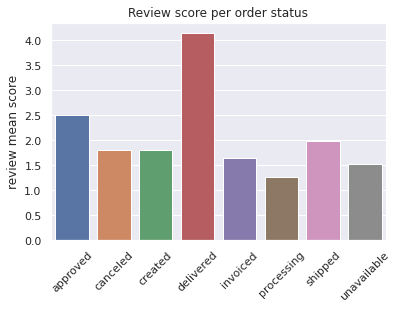

In [ ]:
ax = sns.barplot(x=['approved', 'canceled', 'created', 'delivered', 'invoiced',
       'processing', 'shipped', 'unavailable'], y=[2.5,1.8,1.8,4.142728566788975,1.6321656050955413,1.2691029900332227,1.9896115627822946,1.526272577996716])
plt.xticks(rotation=45)
ax.set_ylabel('review mean score')
ax.set_title('Review score per order status')

The order_status has a direct impact on score reviews. The delivered orders have a review mean score above 4 out of 5. Conversely, other order status are badly reviewed.

# Feature Engineering

In this section, I will be creating new features:
  - nb_days_to_deliver 
  - nb_days_ahead_estimate
  - message length
  - title_lenght
  
Further EDA is performed too.

In [ ]:
# create 2 features
orders['nb_days_to_deliver'] =  \
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders['nb_days_ahead_estimate'] = \
(orders['order_estimated_delivery_date'].dt.date - orders['order_delivered_customer_date'].dt.date).dt.days

Text(0.5, 1.0, 'Number of days to get delivered')

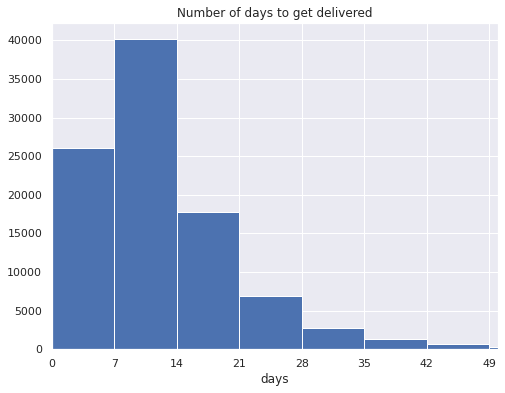

In [ ]:
# plot histograme to visualize how long orders are delivered
fig = plt.figure(figsize=(8,6))
plt.hist(orders['nb_days_to_deliver'], bins=[i for i in range(0,250,7)])
plt.xticks([i for i in range(0,250,7)])
plt.xlim(0,50)
plt.xlabel('days')
plt.title('Number of days to get delivered')

Most ordered get delivered between 1 and 2 weeks.

Text(0.5, 1.0, 'Number of days ahead estimate')

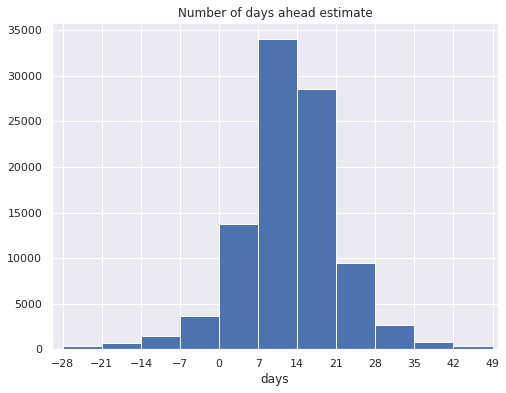

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.hist(orders['nb_days_ahead_estimate'], bins=[i for i in range(-28,250,7)])
plt.xticks([i for i in range(-28,250,7)])
plt.xlim(-30,50)
plt.xlabel('days')
plt.title('Number of days ahead estimate')

Most orders get delivered between 10-20 days. Around 5% of the orders were not delivered on time.

In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
nb_days_to_deliver               2965
nb_days_ahead_estimate           2965
dtype: int64

In [ ]:
payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
payments_c = payments.groupby('order_id').agg({'payment_installments':'max', 'payment_value':'sum'})

In [ ]:
payments_c

,payment_installments,payment_value
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,2,72.19
00018f77f2f0320c557190d7a144bdd3,3,259.83
000229ec398224ef6ca0657da4fc703e,5,216.87
00024acbcdf0a6daa1e931b038114c75,2,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,3,218.04
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,386.53
fffce4705a9662cd70adb13d4a31832d,3,116.85


In [ ]:
payments_c['payment_installments'].value_counts()

1     48268
2     12363
3     10429
4      7070
10     5315
5      5227
8      4251
6      3908
7      1622
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


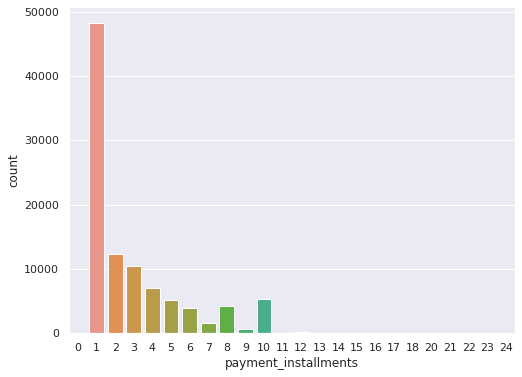

In [ ]:
# countplot payment installments
fig = plt.figure(figsize=(8,6))
sns.countplot(payments_c['payment_installments'])

Text(0.5, 0, 'order value')

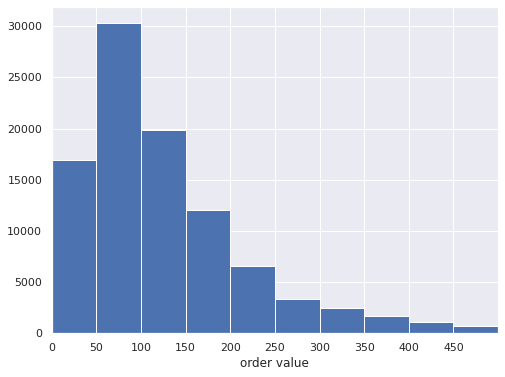

In [ ]:
# plot hist to display order values
fig = plt.figure(figsize=(8,6))
plt.hist(payments_c['payment_value'], bins=[i for i in range(0,15000,50)])
plt.xticks([i for i in range(0,500,50)])
plt.xlim(0,500)
plt.xlabel('order value')

Most of the orders are between 50-100 brazilian real.

In [ ]:
items_c = items.groupby('order_id').agg({'price':'sum', 'freight_value':'sum'})
items_c

,price,freight_value
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,239.90,19.93
000229ec398224ef6ca0657da4fc703e,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14
...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,99.90,16.95


In [ ]:
reviews.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41753,100000,100000
unique,99173,99441,NaN,4600,36921,637,99010
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,426,230,466,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [ ]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15,2017-12-16 01:29:43


In [ ]:
# replace Nan values with None
reviews[['review_comment_title', 'review_comment_message']] = \
reviews[['review_comment_title', 'review_comment_message']].fillna('None')

In [ ]:
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [ ]:
# repace None with 0
def count_char(x):
  if x=='None':
    char = 0
  else:
    char = len(x.strip().replace(' ', ''))
  return char

In [ ]:
reviews['review_comment_message'].apply(count_char).max()

200

In [ ]:
# create 2 features that count the number of characters for review message and title. 
reviews['message_length'] = reviews['review_comment_message'].apply(count_char)
reviews['title_length'] = reviews['review_comment_title'].apply(count_char)
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,message_length,title_length
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59,0,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13,0,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24,0,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,32,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,86,0
...,...,...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09,2017-12-11 20:06:42,0,0
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,59,0
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01,2018-07-02 12:59:13,0,0
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,None,Solicitei a compra de uma capa de retrovisor c...,2017-12-15,2017-12-16 01:29:43,167,0


average length message per review score

In [ ]:
reviews.groupby('review_score').agg({'message_length':'mean'})

,message_length
review_score,
1,65.965677
2,56.246059
3,31.403524
4,16.513594
5,15.991571


Text(0.5, 1.0, 'mean message length per review score')

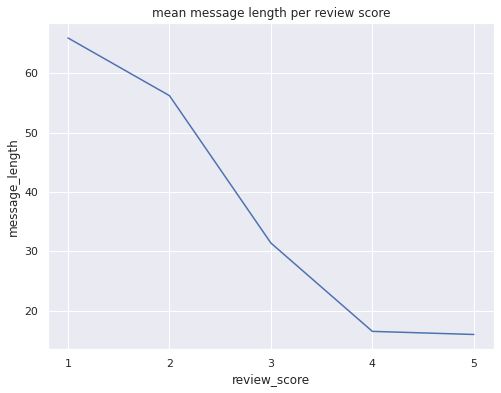

In [ ]:
fi=plt.figure(figsize=(8,6))
sns.lineplot(data=reviews.groupby('review_score').agg({'message_length':'mean'})['message_length'])
plt.xticks([1,2,3,4,5])
plt.title('mean message length per review score')

In [ ]:
reviews.groupby('review_score').agg({'title_length':'mean'})

,title_length
review_score,
1,2.335807
2,2.058114
3,1.166526
4,0.857135
5,1.179014


Unsatified customers tend to give longer reviews

In [ ]:
reviews_c = reviews.groupby('order_id').agg({'review_score':'mean', 'title_length':'mean', 'message_length':'mean'})
reviews_c

,review_score,title_length,message_length
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,5.0,0.0,41.0
00018f77f2f0320c557190d7a144bdd3,4.0,0.0,0.0
000229ec398224ef6ca0657da4fc703e,5.0,0.0,78.0
00024acbcdf0a6daa1e931b038114c75,4.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,5.0,0.0,33.0
...,...,...,...
fffc94f6ce00a00581880bf54a75a037,5.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,5.0,0.0,0.0
fffce4705a9662cd70adb13d4a31832d,5.0,0.0,0.0


# Merge Dataframe

In [ ]:
df = orders.merge(payments_c, on='order_id', how='inner')
df = df.merge(reviews_c, on='order_id', how='inner')
df = customers.merge(df, on='customer_id', how='inner')
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_days_to_deliver,nb_days_ahead_estimate,payment_installments,payment_value,review_score,title_length,message_length
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8.0,11.0,2,146.87,4.0,0.0,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16.0,8.0,8,335.48,5.0,0.0,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0,-1.0,7,157.73,5.0,0.0,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14.0,13.0,1,173.30,5.0,0.0,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0,6.0,8,252.25,5.0,11.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6.0,12.0,6,88.78,4.0,9.0,0.0
99436,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7.0,9.0,3,129.06,5.0,0.0,0.0
99437,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30.0,-7.0,5,56.04,1.0,8.0,58.0
99438,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,12.0,19.0,2,711.07,5.0,0.0,0.0


In [ ]:
df.groupby('customer_unique_id').agg({'order_id':'count','payment_value':'sum'})['order_id'].value_counts()/96096

1     0.968802
2     0.028565
3     0.002112
4     0.000312
5     0.000083
6     0.000062
7     0.000031
17    0.000010
9     0.000010
Name: order_id, dtype: float64

In [ ]:
(df.groupby('customer_unique_id').agg({'order_id':'count','payment_value':'sum'})['order_id'].value_counts()/96096).index

Int64Index([1, 2, 3, 4, 5, 6, 7, 17, 9], dtype='int64')

Text(0.5, 1.0, 'Number of orders per unique customer')

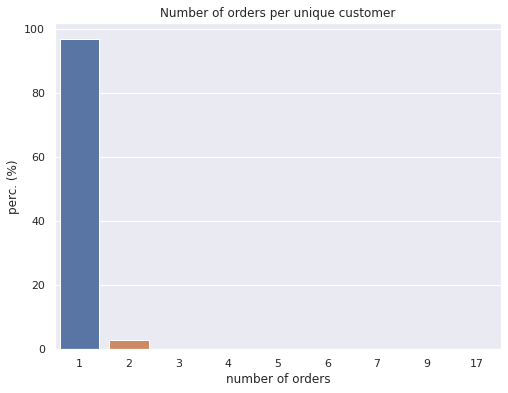

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.barplot(y=df.groupby('customer_unique_id').agg({'order_id':'count','payment_value':'sum'})['order_id'].value_counts()/96096 *100, x=(df.groupby('customer_unique_id').agg({'order_id':'count','payment_value':'sum'})['order_id'].value_counts()/96096).index)
plt.ylabel('perc. (%)')
plt.xlabel('number of orders')
plt.title('Number of orders per unique customer')

In [ ]:
last_order_date = df['order_purchase_timestamp'].max()

In [ ]:
last_order_date = df['order_purchase_timestamp'].max()
df['last_order'] = (last_order_date - df['order_purchase_timestamp']).dt.days

In [ ]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_days_to_deliver,nb_days_ahead_estimate,payment_installments,payment_value,review_score,title_length,message_length,last_order
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8.0,11.0,2,146.87,4.0,0.0,0.0,519
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16.0,8.0,8,335.48,5.0,0.0,0.0,277
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0,-1.0,7,157.73,5.0,0.0,0.0,151
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14.0,13.0,1,173.30,5.0,0.0,0.0,218
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0,6.0,8,252.25,5.0,11.0,38.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6.0,12.0,6,88.78,4.0,9.0,0.0,193
99436,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7.0,9.0,3,129.06,5.0,0.0,0.0,196
99437,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30.0,-7.0,5,56.04,1.0,8.0,58.0,191
99438,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,12.0,19.0,2,711.07,5.0,0.0,0.0,347


# RFM

## RFM

In [ ]:
RFM = df.groupby('customer_unique_id').agg({'last_order':'min', 'customer_id':'count', 'payment_value':'sum'})

In [ ]:
RFM

,last_order,customer_id,payment_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
0000f46a3911fa3c0805444483337064,585,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
0004aac84e0df4da2b147fca70cf8255,336,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58
ffff371b4d645b6ecea244b27531430a,617,1,112.46


In [ ]:
RFM = RFM.rename(columns={'last_order':'Recency', 'customer_id':'Frequency', 'payment_value':'Monetary'})

In [ ]:
RFM.describe()

,Recency,Frequency,Monetary
count,96095.000000,96095.000000,96095.000000
mean,287.730756,1.034809,166.594226
std,153.407846,0.214385,231.428912
min,0.000000,1.000000,0.000000
25%,163.000000,1.000000,63.120000
50%,268.000000,1.000000,108.000000
75%,397.000000,1.000000,183.530000
max,772.000000,17.000000,13664.080000


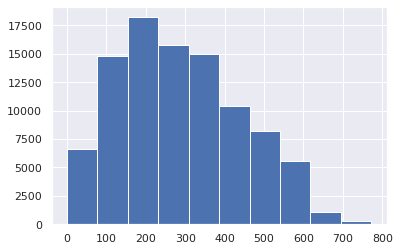

In [ ]:
ax = plt.hist(RFM.Recency)

In [ ]:
RFM.groupby('Frequency').agg({'Frequency':'count','Recency':'mean', 'Monetary':'mean'})

,Frequency,Recency,Monetary
Frequency,,,
1,93098,288.359267,161.817111
2,2745,270.290346,294.847137
3,203,253.650246,473.388325
4,30,223.666667,779.129333
5,8,163.250000,759.656250
6,6,263.333333,696.251667
7,3,164.666667,946.853333
9,1,231.000000,1172.660000
17,1,57.000000,927.630000


In [ ]:
quantiles = RFM.quantile(q=[0,0.25,0.5,0.75,1])

In [ ]:
quantiles

,Recency,Frequency,Monetary
0.00,0.0,1.0,0.00
0.25,163.0,1.0,63.12
0.50,268.0,1.0,108.00
0.75,397.0,1.0,183.53
1.00,772.0,17.0,13664.08


In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFM['R'] = RFM['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM['F'] = RFM['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFM['M'] = RFM['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFM.head()

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1,4,2
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1,4,4
0000f46a3911fa3c0805444483337064,585,1,86.22,4,4,3
0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,3,4,4
0004aac84e0df4da2b147fca70cf8255,336,1,196.89,3,4,1


In [ ]:
RFM[RFM['R']==4]

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
0000f46a3911fa3c0805444483337064,585,1,86.22,4,4,3
0005e1862207bf6ccc02e4228effd9a0,591,1,150.12,4,4,2
0006fdc98a402fceb4eb0ee528f6a8d4,456,1,29.00,4,4,4
000a5ad9c4601d2bbdd9ed765d5213b3,432,1,91.28,4,4,3
000de6019bb59f34c099a907c151d855,425,1,257.44,4,4,1
...,...,...,...,...,...,...
fff3a9369e4b7102fab406a334a678c3,432,1,102.74,4,4,3
fff699c184bcc967d62fa2c6171765f7,411,1,55.00,4,4,4
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,2067.42,4,4,1


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFM['RFMGroup'] = RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM['RFMScore'] = RFM[['R', 'F', 'M']].sum(axis = 1)
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1,4,2,142,7
0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1,4,4,144,9
0000f46a3911fa3c0805444483337064,585,1,86.22,4,4,3,443,11
0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,3,4,4,344,11
0004aac84e0df4da2b147fca70cf8255,336,1,196.89,3,4,1,341,8


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFM.RFMScore, q = 4, labels = Loyalty_Level)
RFM['RFM_Loyalty_Level'] = Score_cuts.values
RFM.reset_index().head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,1,4,2,142,7,Platinum
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,1,4,4,144,9,Gold
2,0000f46a3911fa3c0805444483337064,585,1,86.22,4,4,3,443,11,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,3,4,4,344,11,Bronze
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,3,4,1,341,8,Platinum


In [ ]:
#Validate the data for RFMGroup = 111
RFM[RFM['RFMGroup']=='111'].sort_values('Monetary', ascending=False)


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
customer_unique_id,,,,,,,,,
46450c74a0d8c5ca9395da1daac6c120,60,3,9553.02,1,1,1,111,3,Platinum
c8460e4251689ba205045f3ea17884a1,70,4,4655.91,1,1,1,111,3,Platinum
7b0eaf68a16e4808e5388c67345033c9,151,2,2340.08,1,1,1,111,3,Platinum
906a8a4ec9f3d4c3e64fa6d1c4fe6009,89,2,2020.86,1,1,1,111,3,Platinum
0341bbd5c969923a0f801b9e2d10a7b8,140,2,1999.68,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...
94e5ea5a8c1bf546db2739673060c43f,161,2,187.17,1,1,1,111,3,Platinum
91352e06066eef42b60b24049ccde4fd,55,2,186.56,1,1,1,111,3,Platinum
a26fff917d367b218a794da1eecba3fc,111,2,185.94,1,1,1,111,3,Platinum


In [ ]:
RFM['Monetary'].nlargest(10)

customer_unique_id
0a0a92112bd4c708ca5fde585afaa872    13664.08
46450c74a0d8c5ca9395da1daac6c120     9553.02
da122df9eeddfedc1dc1f5349a1a690c     7571.63
763c8b1c9c68a0229c42c9fc6f662b93     7274.88
dc4802a71eae9be1dd28f5d788ceb526     6929.31
459bef486812aa25204be022145caa62     6922.21
ff4159b92c40ebe40454e3e6a7c35ed6     6726.66
4007669dec559734d6f53e029e360987     6081.54
5d0a2980b292d049061542014e8960bf     4809.44
eebb5dda148d3893cdaf5b5ca3040ccb     4764.34
Name: Monetary, dtype: float64

In [ ]:
RFM['RFMScore'].value_counts().sort_index()

3       564
4       710
5       728
6      6228
7     11787
8     17206
9     23007
10    17652
11    12092
12     6121
Name: RFMScore, dtype: int64

In [ ]:
RFM['RFM_Loyalty_Level'].value_counts().sort_index()

Platinum    37223
Gold        23007
Silver      17652
Bronze      18213
Name: RFM_Loyalty_Level, dtype: int64

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFM[['Recency', 'Frequency', 'Monetary']].apply(lambda x: np.log(x+1), axis = 1).round(3)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


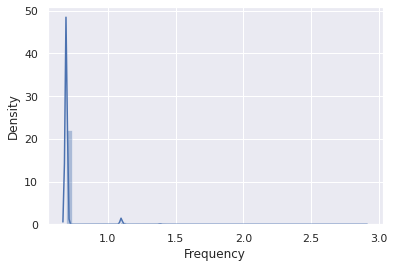

In [ ]:
sns.distplot(Log_Tfd_Data['Frequency'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


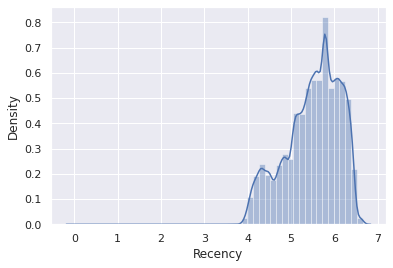

In [ ]:
sns.distplot(Log_Tfd_Data['Recency'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


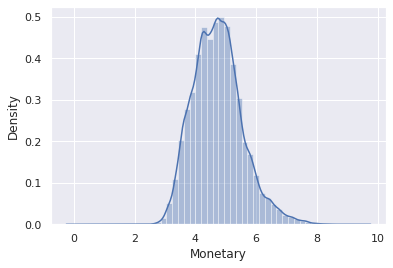

In [ ]:
sns.distplot(Log_Tfd_Data['Monetary'])

## RFM Kmeans

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFM.index, columns = Log_Tfd_Data.columns)

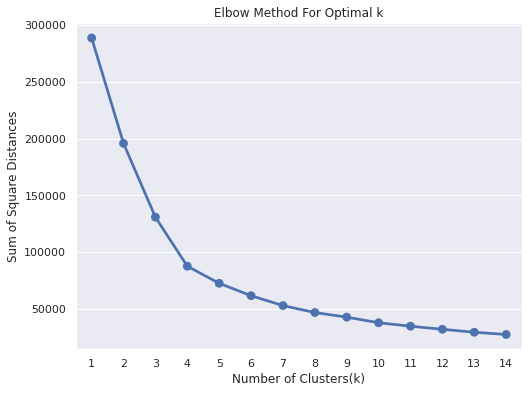

In [ ]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,6))
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fba7d88bb38>,
                     model=None)

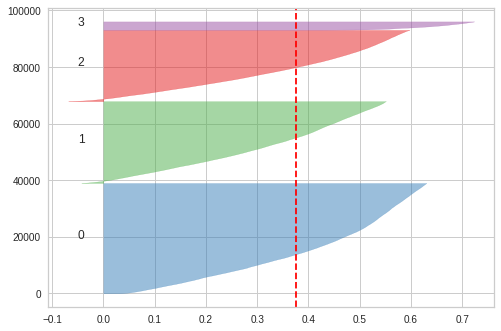

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Scaled_Data)        # Fit the data to the visualizer
# visualizer.show()    

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFM['Cluster'] = KMean_clust.labels_
RFM.head()

In [ ]:
RFM.Cluster.value_counts()

In [ ]:
RFM.RFM_Loyalty_Level.value_counts()

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "yellow", "blue"]
RFM['Color'] = RFM['Cluster'].map(lambda p: Colors[p])
ax = RFM.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFM['Color']
)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "yellow", "blue"]
RFM['Color'] = RFM['Cluster'].map(lambda p: Colors[p])
ax = RFM.plot(    
    kind="scatter", 
    x="Recency", y="Monetary",
    figsize=(10,8),
    c = RFM['Color']
)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "yellow", "blue"]
RFM['Color'] = RFM['Cluster'].map(lambda p: Colors[p])
ax = RFM.plot(    
    kind="scatter", 
    x="Frequency", y="Monetary",
    figsize=(10,8),
    c = RFM['Color']
)

# Final DF

In [ ]:
# merge items and product
ip = items.merge(products_c, on='product_id', how='left')
ip

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
ip = ip.groupby('order_id').agg({'order_item_id':'count', \
                            'product_id': pd.Series.nunique, 'seller_id': pd.Series.nunique, 'price':'sum', 'freight_value':'sum',\
                            'product_name_lenght':'mean', 'product_description_lenght': 'mean',\
                            'product_photos_qty':'mean'}).reset_index()

In [ ]:
df_new = df.merge(ip, how='inner', on='order_id')
df_new

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_days_to_deliver,nb_days_ahead_estimate,payment_installments,payment_value,review_score,title_length,message_length,last_order,order_item_id,product_id,seller_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8.0,11.0,2,146.87,4.0,0.0,0.0,519,1,1,1,124.99,21.88,41.0,1141.0,1.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16.0,8.0,8,335.48,5.0,0.0,0.0,277,1,1,1,289.00,46.48,43.0,1002.0,3.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0,-1.0,7,157.73,5.0,0.0,0.0,151,1,1,1,139.94,17.79,55.0,955.0,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14.0,13.0,1,173.30,5.0,0.0,0.0,218,1,1,1,149.94,23.36,48.0,1066.0,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0,6.0,8,252.25,5.0,11.0,38.0,80,1,1,1,230.00,22.25,61.0,407.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98660,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6.0,12.0,6,88.78,4.0,9.0,0.0,193,1,1,1,74.90,13.88,51.0,489.0,2.0
98661,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7.0,9.0,3,129.06,5.0,0.0,0.0,196,1,1,1,114.90,14.16,51.0,1193.0,1.0
98662,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30.0,-7.0,5,56.04,1.0,8.0,58.0,191,1,1,1,37.00,19.04,60.0,575.0,1.0
98663,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,12.0,19.0,2,711.07,5.0,0.0,0.0,347,1,1,1,689.00,22.07,59.0,452.0,1.0


In [ ]:
df_cluster = df_new.rename({'order_item_id':'nb_items_ordered',
               'product_id':'nb_unique_products',
               'seller_id':'unique_sellers'}, axis=1)

In [ ]:
df_cluster = df_cluster.drop('last_order', axis=1)
df_cluster

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,nb_days_to_deliver,nb_days_ahead_estimate,payment_installments,payment_value,review_score,title_length,message_length,nb_items_ordered,nb_unique_products,unique_sellers,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8.0,11.0,2,146.87,4.0,0.0,0.0,1,1,1,124.99,21.88,41.0,1141.0,1.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16.0,8.0,8,335.48,5.0,0.0,0.0,1,1,1,289.00,46.48,43.0,1002.0,3.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0,-1.0,7,157.73,5.0,0.0,0.0,1,1,1,139.94,17.79,55.0,955.0,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14.0,13.0,1,173.30,5.0,0.0,0.0,1,1,1,149.94,23.36,48.0,1066.0,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0,6.0,8,252.25,5.0,11.0,38.0,1,1,1,230.00,22.25,61.0,407.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98660,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,6.0,12.0,6,88.78,4.0,9.0,0.0,1,1,1,74.90,13.88,51.0,489.0,2.0
98661,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,7.0,9.0,3,129.06,5.0,0.0,0.0,1,1,1,114.90,14.16,51.0,1193.0,1.0
98662,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30.0,-7.0,5,56.04,1.0,8.0,58.0,1,1,1,37.00,19.04,60.0,575.0,1.0
98663,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,12.0,19.0,2,711.07,5.0,0.0,0.0,1,1,1,689.00,22.07,59.0,452.0,1.0


## Filter DF

In [ ]:
df_cluster.isnull().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
nb_days_to_deliver                0
nb_days_ahead_estimate            0
payment_installments              0
payment_value                     0
review_score                      0
title_length                      0
message_length                    0
nb_items_ordered                  0
nb_unique_products                0
unique_sellers                    0
price                             0
freight_value                     0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
dtype: int64

I will drop rows where:



1.   delivered_customer_date is missing
2.   price + freight != payment_value
3.   sales before 01/01/17 or after 31/08/18








In [ ]:
df_cluster.shape

(98665, 27)

In [ ]:
# keep only orders between 01/01/17 and 31/08/18
df_cluster = df_cluster.query('(order_purchase_timestamp >= datetime.datetime(2017,1,1,0,0,0))\
 and (order_purchase_timestamp <= datetime.datetime(2018,8,31,0,0,0))')
df_cluster.shape

(98353, 27)

In [ ]:
# remove rows where delivery date is missing
df_cluster = df_cluster.loc[df_cluster['order_delivered_customer_date'].notnull()]
df_cluster.shape

(96204, 27)

In [ ]:
# remove rows where (price + freight) != payment_value  (allow error of 0.1)
df_cluster = df_cluster[abs((df_cluster['price'] + df_cluster['freight_value']) - df_cluster['payment_value']) < .1]
df_cluster.shape

(95954, 27)

## Export df


In [ ]:
df_cluster.to_csv('/content/drive/My Drive/OpenClassrooms/POlist_fatmi_amine/P4_olist_cleaned.csv', index=False)